In [1]:
import pandas as pd
import numpy as np

### Stratification
openintro에서 배운 stratified와 hands-on preprocessing에서 배운 stratification 내용이 충돌된다.

일단 이번 예시는 hands-on 내용과 일치하니 hands -on에서 다루는 내용을 넣었다.
![](data/26.png)

In [2]:
from sklearn.datasets import load_iris

data, target = load_iris(as_frame=True, return_X_y=True)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())

### K-fold 예시

In [4]:
import numpy as np
from sklearn.model_selection import KFold

data_random = np.random.randn(9, 1)
cv = KFold(n_splits=3)
for train_index, test_index in cv.split(data_random):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [3 4 5 6 7 8] TEST: [0 1 2]
TRAIN: [0 1 2 6 7 8] TEST: [3 4 5]
TRAIN: [0 1 2 3 4 5] TEST: [6 7 8]


### iris 예시에 적용하기

In [5]:
from sklearn.model_selection import cross_validate

cv = KFold(n_splits=3)
results = cross_validate(model, data, target, cv=cv)
test_score = results["test_score"]
print(f"The average accuracy is "
      f"{test_score.mean():.3f} +/- {test_score.std():.3f}")

The average accuracy is 0.000 +/- 0.000


### 표본이 잘 정리되어있어서 발생한 문제

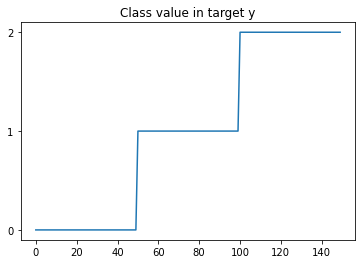

In [8]:
import matplotlib.pyplot as plt

target.plot()
plt.yticks(target.unique())
_ = plt.title("Class value in target y")

### K-fold로 발생한 subset 검토하기

In [15]:
n_splits = 3
cv = KFold(n_splits=n_splits)

train_cv_counts = []
test_cv_counts = []
for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data, target)):
    target_train, target_test = target.iloc[train_idx], target.iloc[test_idx]

    train_cv_counts.append(target_train.value_counts())
    test_cv_counts.append(target_test.value_counts())

### Training set

In [16]:
train_cv_counts = pd.concat(train_cv_counts, axis=1,
                            keys=[f"Fold #{idx}" for idx in range(n_splits)]).sort_index()
train_cv_counts.index.name = "Class label"
train_cv_counts

,Fold #0,Fold #1,Fold #2
Class label,,,
0,NaN,50.0,50.0
1,50.0,NaN,50.0
2,50.0,50.0,NaN


### Test set

In [17]:
test_cv_counts = pd.concat(test_cv_counts, axis=1,
                           keys=[f"Fold #{idx}" for idx in range(n_splits)])
test_cv_counts.index.name = "Class label"
test_cv_counts

,Fold #0,Fold #1,Fold #2
Class label,,,
0,50.0,NaN,NaN
1,NaN,50.0,NaN
2,NaN,NaN,50.0


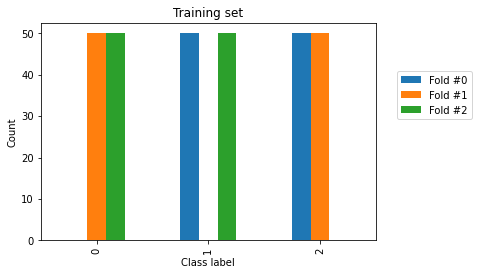

In [18]:
train_cv_counts.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.ylabel("Count")
_ = plt.title("Training set")

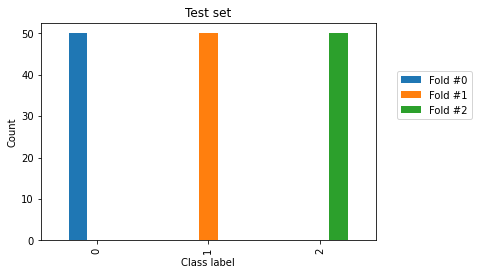

In [19]:
test_cv_counts.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.ylabel("Count")
_ = plt.title("Test set")

### 이러한 오류를 방지하기 위해서 `shuffle=True`를 설정한다.

In [20]:
cv = KFold(n_splits=3, shuffle=True, random_state=0)
results = cross_validate(model, data, target, cv=cv)
test_score = results["test_score"]
print(f"The average accuracy is "
      f"{test_score.mean():.3f} +/- {test_score.std():.3f}")

The average accuracy is 0.953 +/- 0.009


### stratification이 필요한 이유
one might want to split our data by preserving the original class frequencies: we want to stratify our data by class.

In [21]:
train_cv_counts = []
test_cv_counts = []
for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data, target)):
    target_train, target_test = target.iloc[train_idx], target.iloc[test_idx]

    train_cv_counts.append(target_train.value_counts())
    test_cv_counts.append(target_test.value_counts())
train_cv_counts = pd.concat(train_cv_counts, axis=1,
                            keys=[f"Fold #{idx}" for idx in range(n_splits)])
test_cv_counts = pd.concat(test_cv_counts, axis=1,
                           keys=[f"Fold #{idx}" for idx in range(n_splits)])
train_cv_counts.index.name = "Class label"
test_cv_counts.index.name = "Class label"

### Fold별로 Class label의 비율이 다르다는 것을 알 수 있음

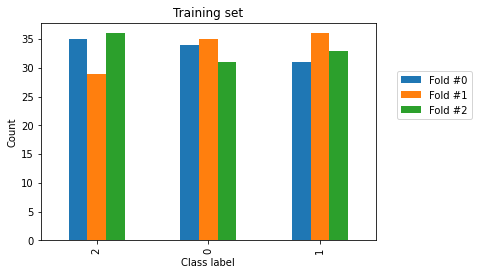

In [22]:
train_cv_counts.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.ylabel("Count")
_ = plt.title("Training set")

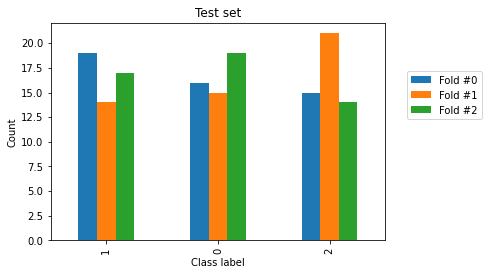

In [23]:
test_cv_counts.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.ylabel("Count")
_ = plt.title("Test set")

### Stratified k-fold를 쓰면 population의 class 비율을 매 fold에서 일정하게 유지시킬 수 있다.

In [24]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3)

In [25]:
results = cross_validate(model, data, target, cv=cv)
test_score = results["test_score"]
print(f"The average accuracy is "
      f"{test_score.mean():.3f} +/- {test_score.std():.3f}")

The average accuracy is 0.960 +/- 0.016


In [26]:
train_cv_counts = []
test_cv_counts = []
for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data, target)):
    target_train, target_test = target.iloc[train_idx], target.iloc[test_idx]

    train_cv_counts.append(target_train.value_counts())
    test_cv_counts.append(target_test.value_counts())
train_cv_counts = pd.concat(train_cv_counts, axis=1,
                            keys=[f"Fold #{idx}" for idx in range(n_splits)])
test_cv_counts = pd.concat(test_cv_counts, axis=1,
                           keys=[f"Fold #{idx}" for idx in range(n_splits)])
train_cv_counts.index.name = "Class label"
test_cv_counts.index.name = "Class label"

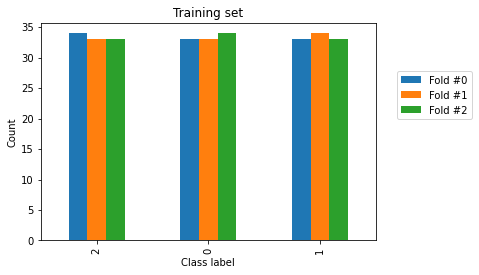

In [27]:
train_cv_counts.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.ylabel("Count")
_ = plt.title("Training set")

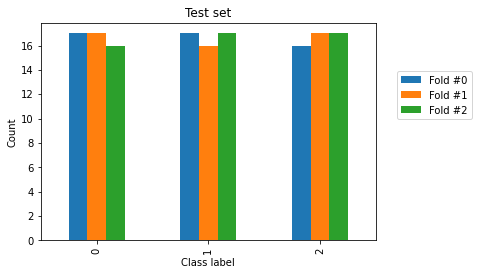

In [28]:
test_cv_counts.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.ylabel("Count")
_ = plt.title("Test set")

### Groupfold => 예시가 이해가 되지않아서 이런게 있다 정도로만 이해하고 넘어가자.

In [29]:
from sklearn.datasets import load_digits

digits = load_digits()
data, target = digits.data, digits.target

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1_000))

### Shuffle = True or False

In [33]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(shuffle=False)
test_score_no_shuffling = cross_val_score(model, data, target, cv=cv,
                                          n_jobs=2)
print(f"The average accuracy is "
      f"{test_score_no_shuffling.mean():.3f} +/- "
      f"{test_score_no_shuffling.std():.3f}")

The average accuracy is 0.931 +/- 0.026


In [37]:
cv = KFold(shuffle=True)
test_score_with_shuffling = cross_val_score(model, data, target, cv=cv,
                                            n_jobs=2)
print(f"The average accuracy is "
      f"{test_score_with_shuffling.mean():.3f} +/- "
      f"{test_score_with_shuffling.std():.3f}")

The average accuracy is 0.969 +/- 0.004


In [38]:
import pandas as pd

all_scores = pd.DataFrame(
    [test_score_no_shuffling, test_score_with_shuffling],
    index=["KFold without shuffling", "KFold with shuffling"],
).T

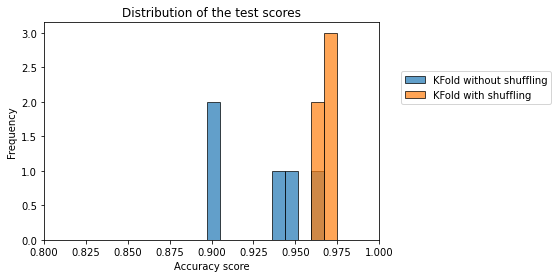

In [39]:
import matplotlib.pyplot as plt

all_scores.plot.hist(bins=10, edgecolor="black", alpha=0.7)
plt.xlim([0.8, 1.0])
plt.xlabel("Accuracy score")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Distribution of the test scores")

색이 다른건 파란색과 중복됐기 때문임

### Group fold 중단

### None i.i.d. data
* it is quite common to assume that the data are i.i.d, meaning that the generative process does not have any memory of past samples to generate new samples.
  
* i.i.d => independent and identically distributed